In [1]:
# imports
import urllib, json
import pandas as pd
import seaborn as sns
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df = pd.read_json('getAllMovies.json')



In [2]:
df.head()

,id,year,title,imdbid,rating
0,9602,1874,Passage de Venus,3155794,0
1,9804,1877,La Rosace Magique,14495706,0
2,9603,1878,Sallie Gardner at a Gallop,2221420,0
3,9806,1878,Le singe musicien,12592084,0
4,9816,1881,Athlete Swinging a Pick,7816420,0


In [3]:
dfNew = df[df['year']>=1967]
dfNew.head()


,id,year,title,imdbid,rating
1244,301,1967,Cool Hand Luke,0061512,1
1245,493,1967,"Jungle Book, The",0061852,1
1246,616,1967,"Graduate, The",0061722,2
1247,2054,1967,Marketa Lazarova,0063278,1
1248,2083,1967,Bonnie and Clyde,0061418,3


In [4]:
dfNew.rename(columns={'rating':'Bechdel Score'}, inplace=True)


In [5]:
dfNew['year'] = pd.to_datetime(dfNew['year'], format='%Y')


In [6]:
dfNew['Bechdel Score'] = dfNew['Bechdel Score'].astype('category',copy=False)


<AxesSubplot:xlabel='Bechdel Score', ylabel='count'>

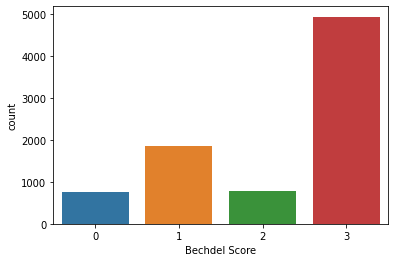

In [7]:
sns.countplot(x='Bechdel Score',data=dfNew)


In [8]:
li = []
for i in dfNew['Bechdel Score']:
    if(i<3):
        li.append(0)
    else:
        li.append(1)
dfNew['pass_test'] = li
dfNew


,id,year,title,imdbid,Bechdel Score,pass_test
1244,301,1967-01-01,Cool Hand Luke,0061512,1,0
1245,493,1967-01-01,"Jungle Book, The",0061852,1,0
1246,616,1967-01-01,"Graduate, The",0061722,2,0
1247,2054,1967-01-01,Marketa Lazarova,0063278,1,0
1248,2083,1967-01-01,Bonnie and Clyde,0061418,3,1
...,...,...,...,...,...,...
9565,10370,2022-01-01,Incroyable mais vrai,13145534,1,0
9566,10371,2022-01-01,Lightyear,10298810,2,0
9567,10372,2022-01-01,Chip &#39;n Dale: Rescue Rangers,3513500,3,1
9568,10375,2022-01-01,All of Us Are Dead,14169960,1,0


<AxesSubplot:xlabel='pass_test', ylabel='count'>

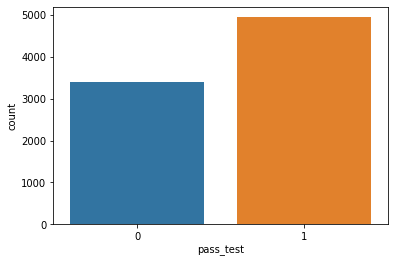

In [9]:
sns.countplot(x='pass_test',data=dfNew)


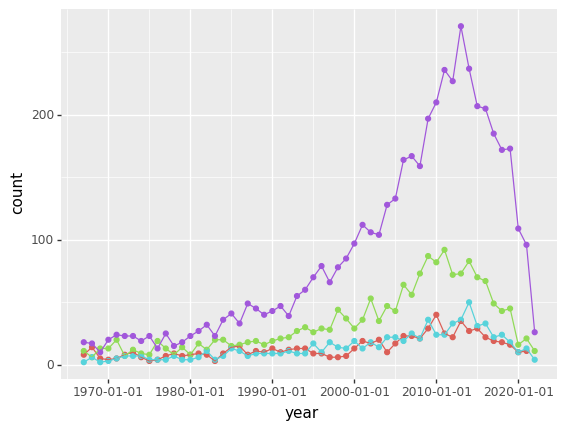

<ggplot: (309679002)>

In [12]:
from plotnine import *
(ggplot(dfNew)+geom_point(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False)+geom_line(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False))


In [14]:
imdb = pd.read_csv('movies.csv')
imdbNew = imdb[['title','rating']]
dfNew = pd.merge(dfNew, imdbNew, how='left', left_on=['title'], right_on=['title'])
dfNew.head()


,id,year,title,imdbid,Bechdel Score,pass_test,rating
0,301,1967-01-01,Cool Hand Luke,0061512,1,0,8.2
1,493,1967-01-01,"Jungle Book, The",0061852,1,0,7.5
2,493,1967-01-01,"Jungle Book, The",0061852,1,0,5.9
3,616,1967-01-01,"Graduate, The",0061722,2,0,8.2
4,2054,1967-01-01,Marketa Lazarova,0063278,1,0,NaN


In [15]:
# Dropping rows with null values:
dfNew = dfNew.dropna()
dfNew = dfNew.drop('id',axis=1)
# Creating a new dataframe with only year, Bechdel scores, and imdb rating:
new = dfNew.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()
new.head()


,year,Bechdel Score,rating
0,1967-01-01,0,7.700000
1,1967-01-01,1,7.125000
2,1967-01-01,2,6.750000
3,1967-01-01,3,6.658333
4,1968-01-01,0,7.262500


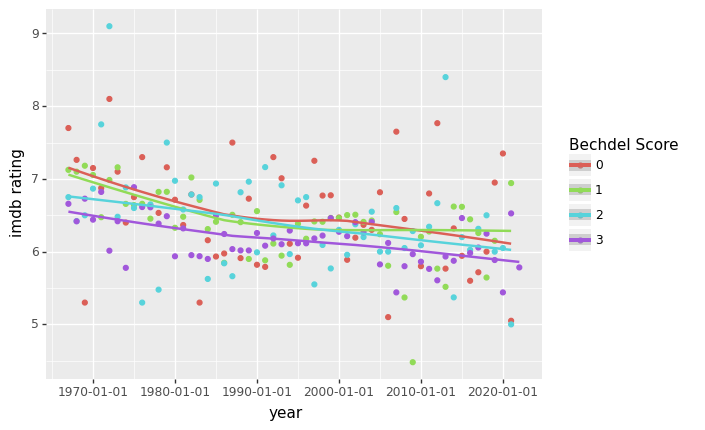

<ggplot: (313875177)>

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Plot year against IMDB rating and Bechdel Score:
ggplot(new,aes(x='year',y='rating',color='Bechdel Score'))+ geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating")+labs( colour='Bechdel Score' )


In [20]:
import gender_guesser.detector as gen
latest = pd.read_csv('movielatest.csv',encoding = "latin")
dfLatest = latest[['name','director']]
dfLatest.rename(columns={'name':'title'}, inplace=True)
dfLatest = pd.merge(dfNew, dfLatest, how='left', left_on=['title'], right_on=['title'])
dfLatest = dfLatest.dropna()
dfLatest.head()


,year,title,imdbid,Bechdel Score,pass_test,rating,director
7,1967-01-01,Casino Royale,0061452,2,0,5.3,Martin Campbell
11,1967-01-01,Bedazzled,0061391,3,1,6.8,Harold Ramis
12,1967-01-01,Bedazzled,0061391,3,1,5.9,Harold Ramis
24,1968-01-01,Planet of the Apes,0063442,1,0,7.9,Tim Burton
25,1968-01-01,Planet of the Apes,0063442,1,0,5.6,Tim Burton


In [26]:
# Predicting gender of director from first name:
d = gen.Detector()
genders = []
firstNames = dfLatest['director'].str.split().str.get(0)
for i in firstNames[0:len(firstNames)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')
dfLatest['gender'] = genders
dfLatest = dfLatest[dfLatest['gender'] != 'unknown']
# Encode the variable gender into a new dataframe:
dfLatest['Male'] = dfLatest['gender'].map( {'male':1, 'female':0} )
dfLatest.head()


,year,title,imdbid,Bechdel Score,pass_test,rating,director,gender,Male
7,1967-01-01,Casino Royale,0061452,2,0,5.3,Martin Campbell,male,1
11,1967-01-01,Bedazzled,0061391,3,1,6.8,Harold Ramis,male,1
12,1967-01-01,Bedazzled,0061391,3,1,5.9,Harold Ramis,male,1
24,1968-01-01,Planet of the Apes,0063442,1,0,7.9,Tim Burton,male,1
25,1968-01-01,Planet of the Apes,0063442,1,0,5.6,Tim Burton,male,1


<AxesSubplot:xlabel='gender', ylabel='count'>

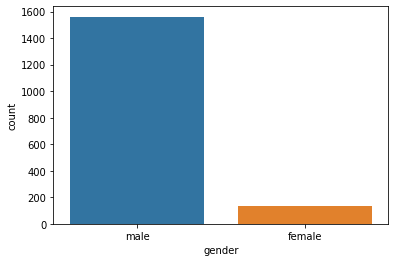

In [27]:
sns.countplot(x='gender',data=dfLatest)


<AxesSubplot:xlabel='Bechdel Score', ylabel='count'>

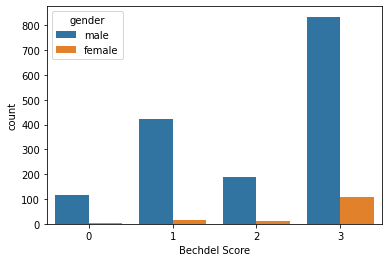

In [23]:
sns.countplot(x='Bechdel Score',hue='gender',data=dfLatest)


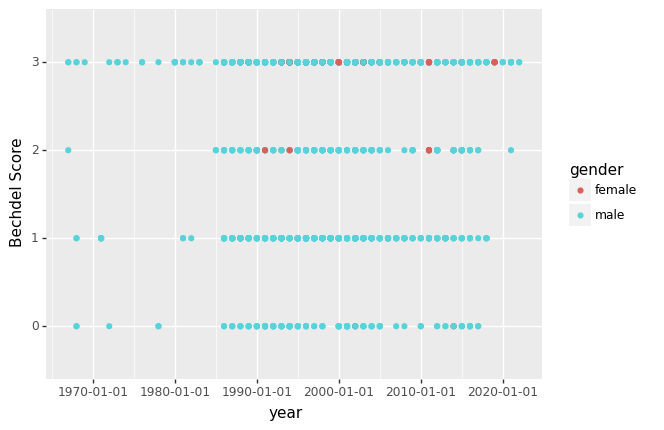

<ggplot: (317169277)>

In [32]:
ggplot(mapping=aes(x = 'year', y = 'Bechdel Score',color='gender'), data = dfLatest)+geom_point()


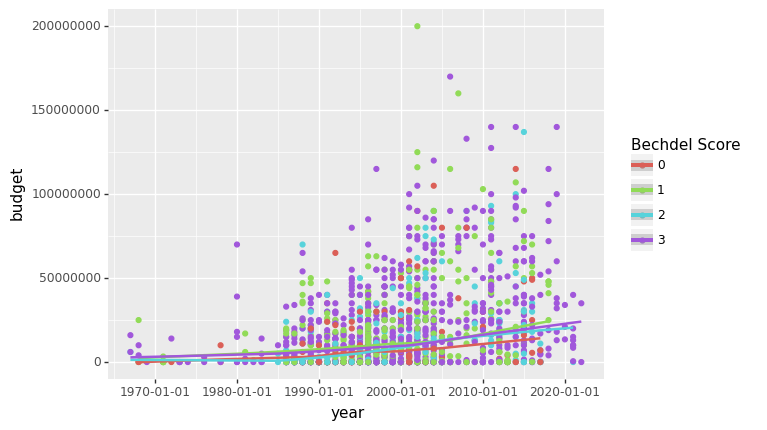

<ggplot: (317184547)>

In [34]:
dfLatest['budget']=latest['budget']
ggplot(mapping=aes(x='year', y='budget',color='Bechdel Score'), data = dfLatest)+geom_point()+geom_smooth()


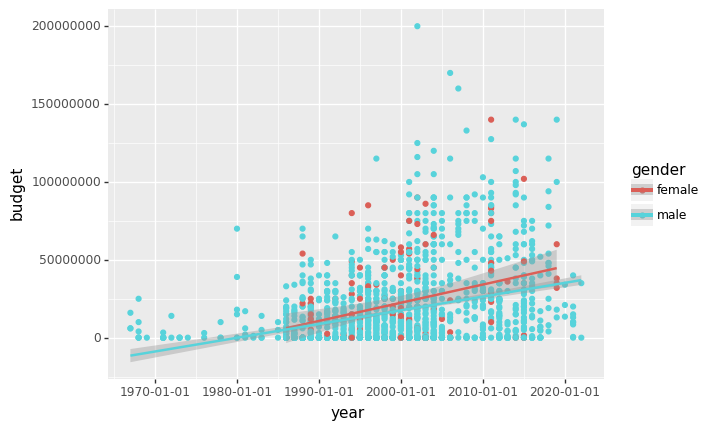

<ggplot: (315618350)>

In [35]:
ggplot(mapping=aes(x = 'year', y = 'budget',color='gender'), data = dfLatest)+geom_point()+geom_smooth()


<AxesSubplot:xlabel='Bechdel Score', ylabel='budget'>

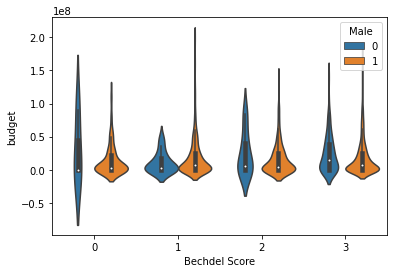

In [36]:
sns.violinplot(x='Bechdel Score',y='budget',hue='Male',data=dfLatest)


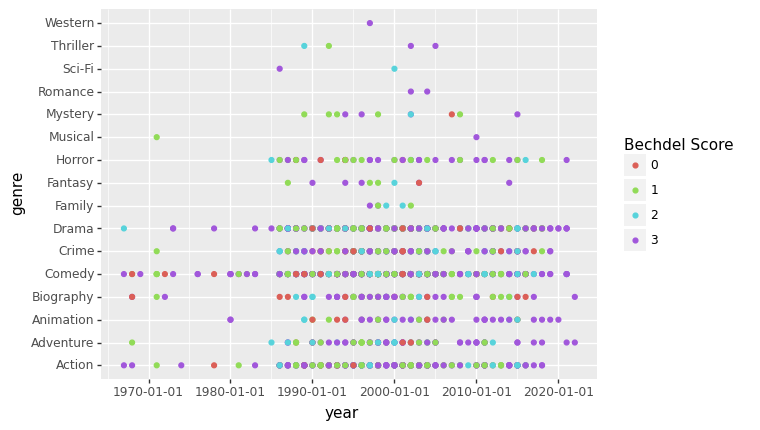

<ggplot: (315236190)>

In [38]:
dfLatest['genre'] = latest['genre']
ggplot(mapping=aes(x = 'year', y = 'genre',color='Bechdel Score'), data = dfLatest)+geom_point()


<AxesSubplot:xlabel='Bechdel Score', ylabel='gross'>

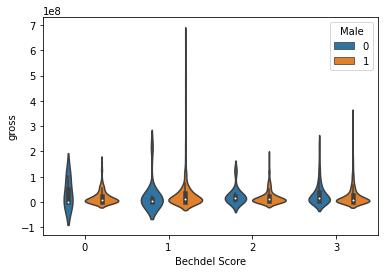

In [39]:
dfLatest['gross'] = latest['gross']
# Movie grossing with Bechdel score and gender:
sns.violinplot(x='Bechdel Score',y='gross',hue='Male',data=dfLatest)


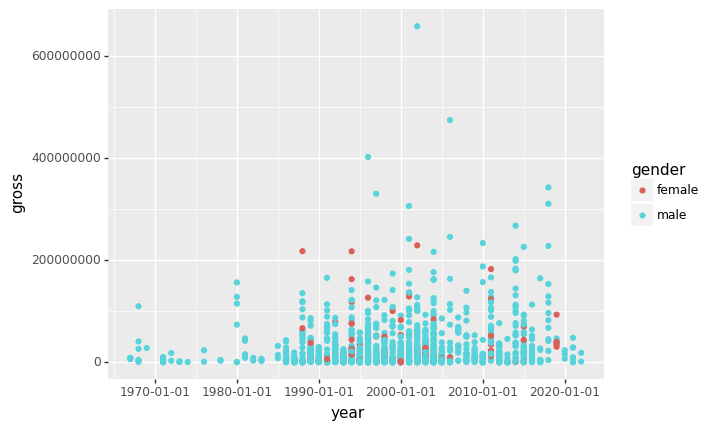

<ggplot: (314194785)>

In [41]:
# Movie grossing with year and gender:
ggplot(mapping=aes(x = 'year', y = 'gross',color='gender'), data = dfLatest)+geom_point()
